In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
pd.set_option('display.max_rows', 1000)

In [2]:
client_categories=pd.read_csv('docs/client_categories.csv',sep=';')

In [3]:
client_categories.head()

,category,description
0,10,VIP/ Management recommendations
1,11,VIP/ Management recommendations (family)
2,17,Private Banking customers walk-in
3,18,Private banking customers payroll
4,20,High income individuals


In [4]:
clients=pd.read_csv('docs/clients_last_2_fixed.csv', sep=';')

In [5]:
clients.head()

,cnum_,categorycode,gender,age,married_,residenttype
0,0CCCDO,81,M,32,not_married,R
1,0CCCFO,70,F,42,not_married,R
2,0CCCGC,50,F,33,married,R
3,0CCCGG,70,M,58,not_married,R
4,0CCCGO,60,M,38,married,R


In [11]:
full_clients=pd.merge(clients,client_categories,how='left',left_on='categorycode',right_on='category')

In [14]:
full_clients.head(5)

,cnum_,categorycode,gender,age,married_,residenttype,category,description
0,0CCCDO,81,M,32,not_married,R,81,Affluent Banking payroll customer
1,0CCCFO,70,F,42,not_married,R,70,Regular retail banking customer
2,0CCCGC,50,F,33,married,R,50,Corporate customer employee/ payroll scheme
3,0CCCGG,70,M,58,not_married,R,70,Regular retail banking customer
4,0CCCGO,60,M,38,married,R,60,RBA employees


In [6]:
clients['residenttype'].unique()

array(['R', 'N'], dtype=object)

In [7]:
stores=pd.read_csv('docs/store_last_2.csv', error_bad_lines=False,encoding= 'windows-1251',sep=';')

In [8]:
stores.head()

,store_name,merchant_name
0,Банкомат,VVVVVVVVVVVVSG/W7J4K 07ZL
1,Киви,VVVVVVVVVVVVR4U4 CXD1O
2,Банкомат,VVVVVVVVVVV/078 WXWLH7J K
3,Банкомат,VVVVVVVVVVV/08 7JJ4T7H AK
4,Банкомат,VVVVVVVVVVV1SV6


In [13]:
transactions=pd.read_csv('docs/transactions_last_2.csv',encoding= 'windows-1251',sep=';',nrows=1000000)

In [16]:
transactions.head(100)

,purchdate,amount,mcc,mrchcity,mrchname,cnum
0,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
1,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
2,2019-10-25 00:00:00,7716900.0,5691,MOSCOW,HXL4K TL4EEXD,ELETCO
3,2019-11-29 00:00:00,5100000.0,6513,SANKT-PETERBU,7X 1E7HXD H1DKW1IKCL,EL0KSF
4,2019-12-03 00:00:00,5023956.6,5944,MOSKVA,73 7HJXK7 (W7X),MPKIJJ
...,...,...,...,...,...,...
95,2019-11-27 00:00:00,1659818.0,9311,MOSCOW,D7HXZ.JL,TIJRRQ
96,2019-12-15 00:00:00,1653000.0,5511,"MOSRENTGEN P,",XXX 4DIA314W AXH84DZ,ECNYFO
97,2019-10-09 00:00:00,1650000.0,8398,MOSKVA,9XD8 9XJX0J,ELG526
98,2019-12-03 00:00:00,1641300.0,9311,MOSCOW,D7HXZ.JL,MNILQT


In [15]:
len(clients)

1355925

In [ ]:
'''
Классификация по признакам

Кластеризация клиентов

дизайн карточки клиента

какие категории клиентов просто выделить?

богатство - бедность

у каждого клиента - количество транзакций и количество
'''

In [22]:
transactions['Строка']=1

In [ ]:
transactions[['cnum','mrchcity']].groupby

In [24]:
clients_unique_cities=transactions.groupby('cnum')['mrchcity'].nunique()

In [25]:
clients_number_of_transactions=transactions.groupby('cnum')['Строка'].sum()

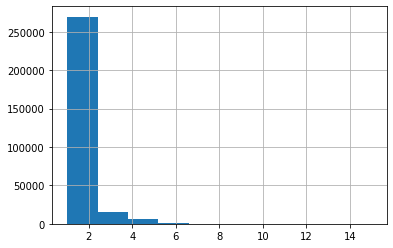

In [28]:
clients_unique_cities.hist()

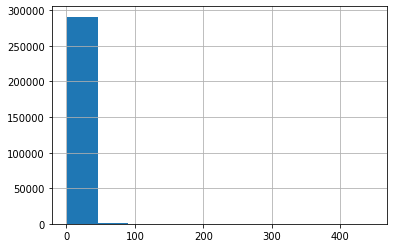

In [32]:
clients_number_of_transactions.hist()

(array([122438.,  56004.,  33482.,  20472.,  14162.,  10915.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

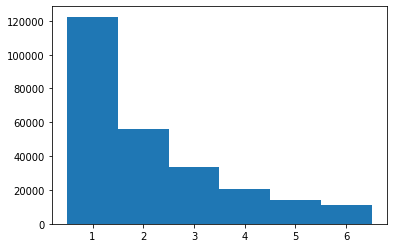

In [35]:
plt.hist(clients_number_of_transactions, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

In [36]:
clients_unique_cities.head()

cnum
0CCCDO    1
0CCCGS    2
0CCCHS    3
0CCCOO    1
0CCCOS    1
Name: mrchcity, dtype: int64

In [37]:
clients_number_of_transactions.head()

cnum
0CCCDO     2
0CCCGS     3
0CCCHS    26
0CCCOO     6
0CCCOS     1
Name: Строка, dtype: int64

In [38]:
tourism=pd.concat([clients_unique_cities, clients_number_of_transactions], axis=1)

In [39]:
tourism.head()

,mrchcity,Строка
cnum,,
0CCCDO,1,2
0CCCGS,2,3
0CCCHS,3,26
0CCCOO,1,6
0CCCOS,1,1


In [40]:
tourism['Коэффициент_туризма']=tourism['mrchcity']/tourism['Строка']

In [43]:
full_clients=pd.merge(full_clients,tourism[['Коэффициент_туризма']],how='left',left_on='cnum_',right_index=True)

In [45]:
full_clients['Коэффициент_туризма'].mean()

0.6842241415276483

In [46]:
full_clients['Коэффициент_туризма'].fillna(0.68,inplace=True)

In [93]:
full_clients[['cnum_','Склонность к путешествиям','Категория']].sample(5)

,cnum_,Склонность к путешествиям,Категория
250315,E48PLG,Слон,Холостяки
112369,8ELDGF,Дендройд,Приезжие
374682,E4HK4I,Лягушка-путешественница,Независимые
699094,EL0YOI,Слон,Семейные
120234,8ELVLQ,Лягушка-путешественница,Приезжие


In [50]:
full_clients.head(30)

,cnum_,categorycode,gender,age,married_,residenttype,category,description,Коэффициент_туризма,Склонность к путешествиям
0,0CCCDO,81,M,32,not_married,R,81,Affluent Banking payroll customer,0.500000,Черепаха
1,0CCCFO,70,F,42,not_married,R,70,Regular retail banking customer,0.680000,Слон
2,0CCCGC,50,F,33,married,R,50,Corporate customer employee/ payroll scheme,0.680000,Слон
3,0CCCGG,70,M,58,not_married,R,70,Regular retail banking customer,0.680000,Слон
4,0CCCGO,60,M,38,married,R,60,RBA employees,0.680000,Слон
5,0CCCGS,50,M,40,not_married,R,50,Corporate customer employee/ payroll scheme,0.666667,Черепаха
6,0CCCHG,70,M,30,married,R,70,Regular retail banking customer,0.680000,Слон
7,0CCCHS,80,M,70,married,R,80,Affluent Banking regular customer,0.115385,Дендройд
8,0CCCNN,70,F,32,not_married,R,70,Regular retail banking customer,0.680000,Слон
9,0CCCNX,50,M,61,married,R,50,Corporate customer employee/ payroll scheme,0.680000,Слон


In [48]:
def to_tourism(x):
    if x<0.4:
        return 'Дендройд'
    if x<0.68:
        return 'Черепаха'
    if x<0.69:
        return 'Слон'
    if x>0.69:
        return 'Лягушка-путешественница'


In [49]:
full_clients['Склонность к путешествиям']=list(map(lambda x:to_tourism(x),full_clients['Коэффициент_туризма']))

In [ ]:
full_clients

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=5)

In [54]:
full_clients['gender_cat']=full_clients['gender'].replace({'M':0,'F':1})

In [58]:
y_pred = KMeans(n_clusters=5).fit_predict(full_clients[['gender_cat','age']])

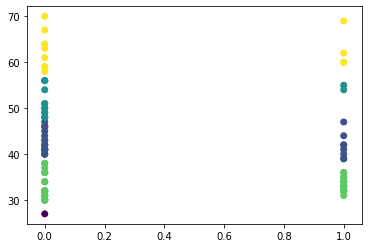

In [62]:
plt.scatter(full_clients['gender_cat'][:100], full_clients['age'][:100], c=y_pred[:100])

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
random_state=None, tol=0.0001, verbose=0)

In [64]:
full_clients['married_cat']=full_clients['married_'].replace({'not_married':0,'married':1})

In [65]:
full_clients['resident_type']=full_clients['residenttype'].replace({'R':0,'N':1})

In [67]:
y_pred2 = KMeans(n_clusters=4).fit_predict(full_clients[['gender_cat','married_cat','resident_type']])

In [68]:
full_clients['Категория_номер']=y_pred2

In [69]:
full_clients['Категория_номер'].unique()

array([0, 1, 3, 2], dtype=int64)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(full_clients[['gender_cat','married_cat','resident_type','age']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaler.transform(full_clients[['gender_cat','married_cat','resident_type','age']])

array([[-0.94619936, -0.74295748, -0.17050324, -0.72652942],
       [ 1.05685973, -0.74295748, -0.17050324,  0.14560451],
       [ 1.05685973,  1.34597205, -0.17050324, -0.63931603],
       ...,
       [-0.94619936, -0.74295748, -0.17050324, -0.63931603],
       [ 1.05685973,  1.34597205, -0.17050324, -0.29046246],
       [-0.94619936,  1.34597205, -0.17050324, -0.46488924]])

In [76]:
y_pred3 = KMeans(n_clusters=4).fit_predict(scaler.transform(full_clients[['gender_cat','married_cat','resident_type','age']]))

In [77]:
full_clients['Категория_номер']=y_pred3

In [78]:
print(full_clients[full_clients['Категория_номер']==0]['gender_cat'].mean())
print(full_clients[full_clients['Категория_номер']==0]['married_cat'].mean())
print(full_clients[full_clients['Категория_номер']==0]['resident_type'].mean())
print(full_clients[full_clients['Категория_номер']==0]['age'].mean())
print('\n')
print(full_clients[full_clients['Категория_номер']==1]['gender_cat'].mean())
print(full_clients[full_clients['Категория_номер']==1]['married_cat'].mean())
print(full_clients[full_clients['Категория_номер']==1]['resident_type'].mean())
print(full_clients[full_clients['Категория_номер']==1]['age'].mean())
print('\n')
print(full_clients[full_clients['Категория_номер']==2]['gender_cat'].mean())
print(full_clients[full_clients['Категория_номер']==2]['married_cat'].mean())
print(full_clients[full_clients['Категория_номер']==2]['resident_type'].mean())
print(full_clients[full_clients['Категория_номер']==2]['age'].mean())
print('\n')
print(full_clients[full_clients['Категория_номер']==3]['gender_cat'].mean())
print(full_clients[full_clients['Категория_номер']==3]['married_cat'].mean())
print(full_clients[full_clients['Категория_номер']==3]['resident_type'].mean())
print(full_clients[full_clients['Категория_номер']==3]['age'].mean())

0.4146100215216904
1.0
0.0
43.20415638955308


0.0
0.0
0.0
38.48281023422715


1.0
0.0
0.0
39.22701513295829


0.23761910977679154
0.13212374363660095
1.0
36.6463124918418


In [79]:
def category(x):
    if x==0:
        return 'Семейные'
    if x==1:
        return 'Холостяки'
    if x==2:
        return 'Независимые'
    if x==3:
        return 'Приезжие'

In [80]:
full_clients['Категория']=list(map(lambda x:category(x),full_clients['Категория_номер']))

In [ ]:
'''
Дано:
cnum_
получаем фичи из 

возраст+зп


'''